<a href="https://colab.research.google.com/github/keerthi97/CODSOFT/blob/main/CODSOFT_ADVERTISING_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/keerthi97/CODSOFT/blob/90dd682f78db6a62b0892a47356e4392f5e9e2c4/datasets/advertising.csv?raw=true", encoding='utf-8', encoding_errors='ignore')

In [3]:
print(len(df))
print(df.dtypes)
print(df.info)
df.head()

200
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object
<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


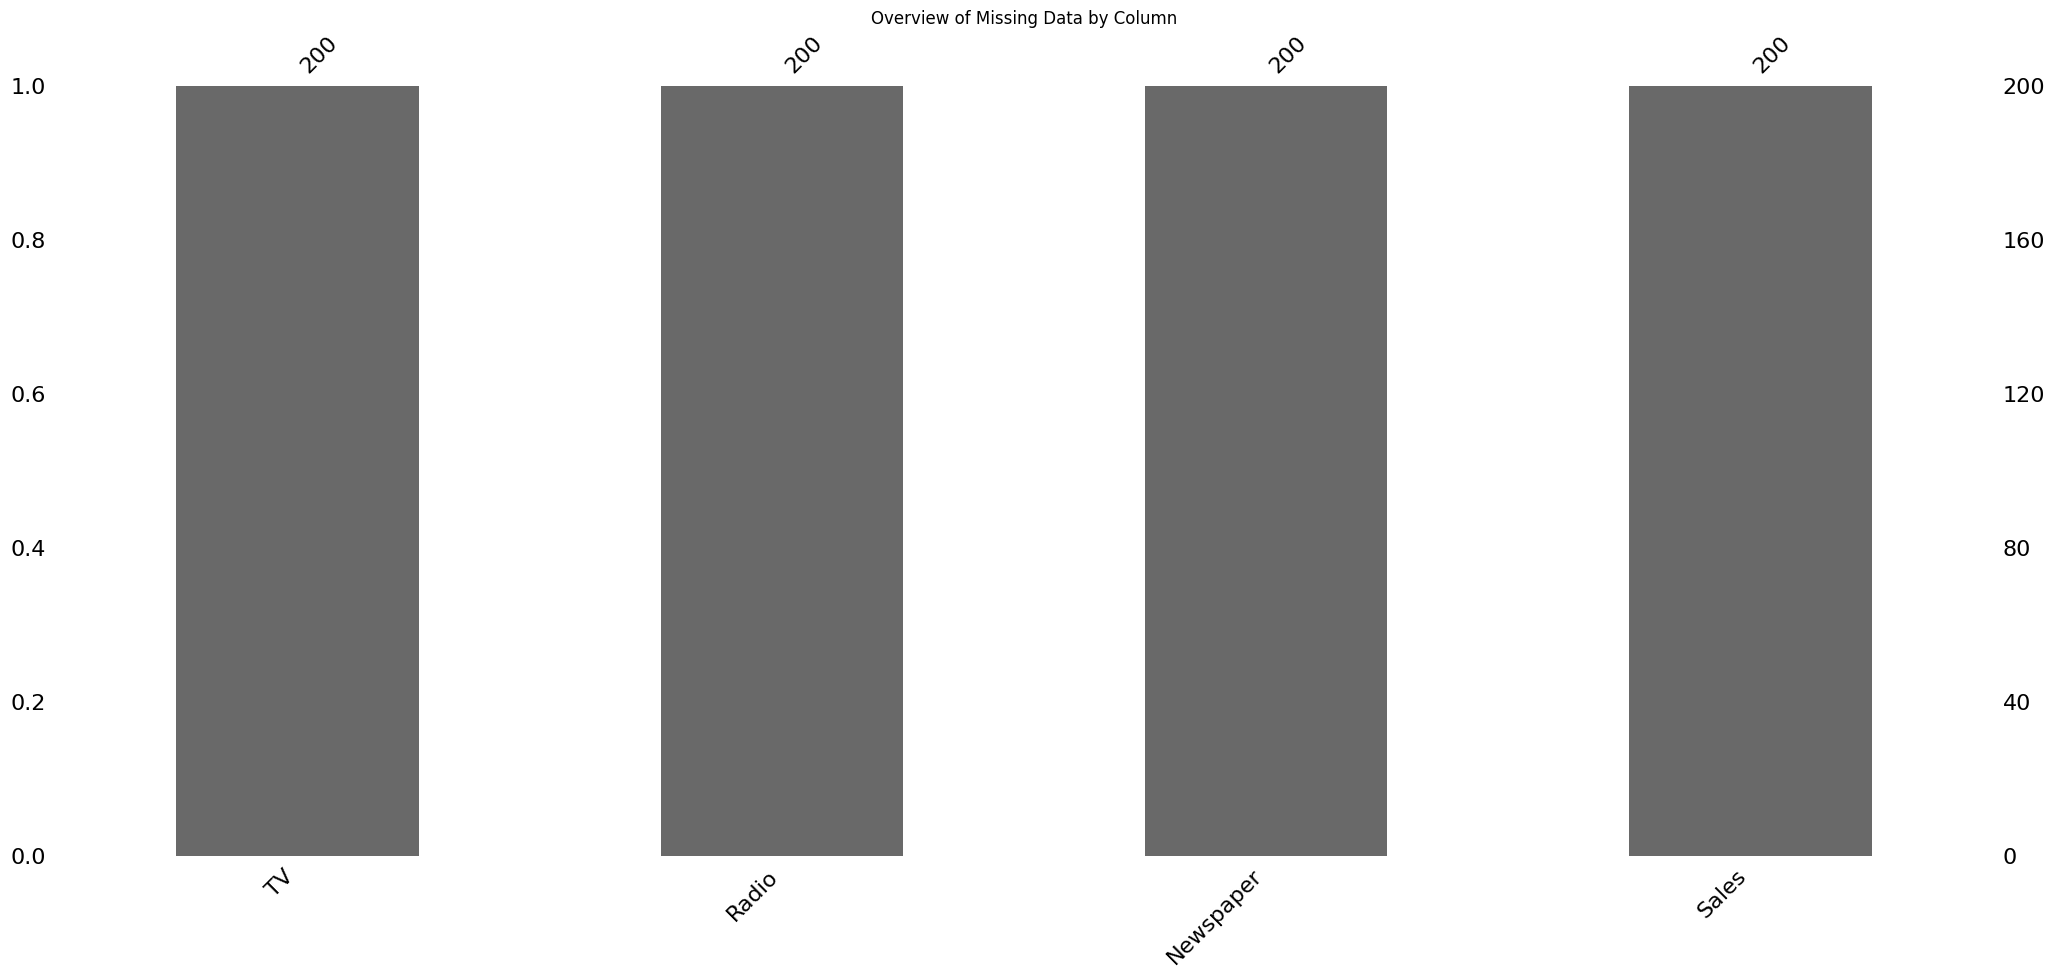

In [5]:

msno.bar(df)
plt.title("Overview of Missing Data by Column")
plt.show()

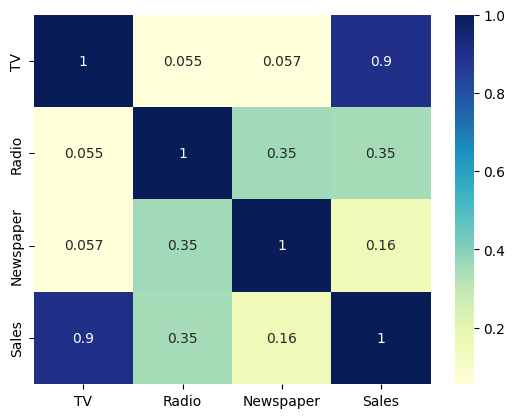

In [6]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()


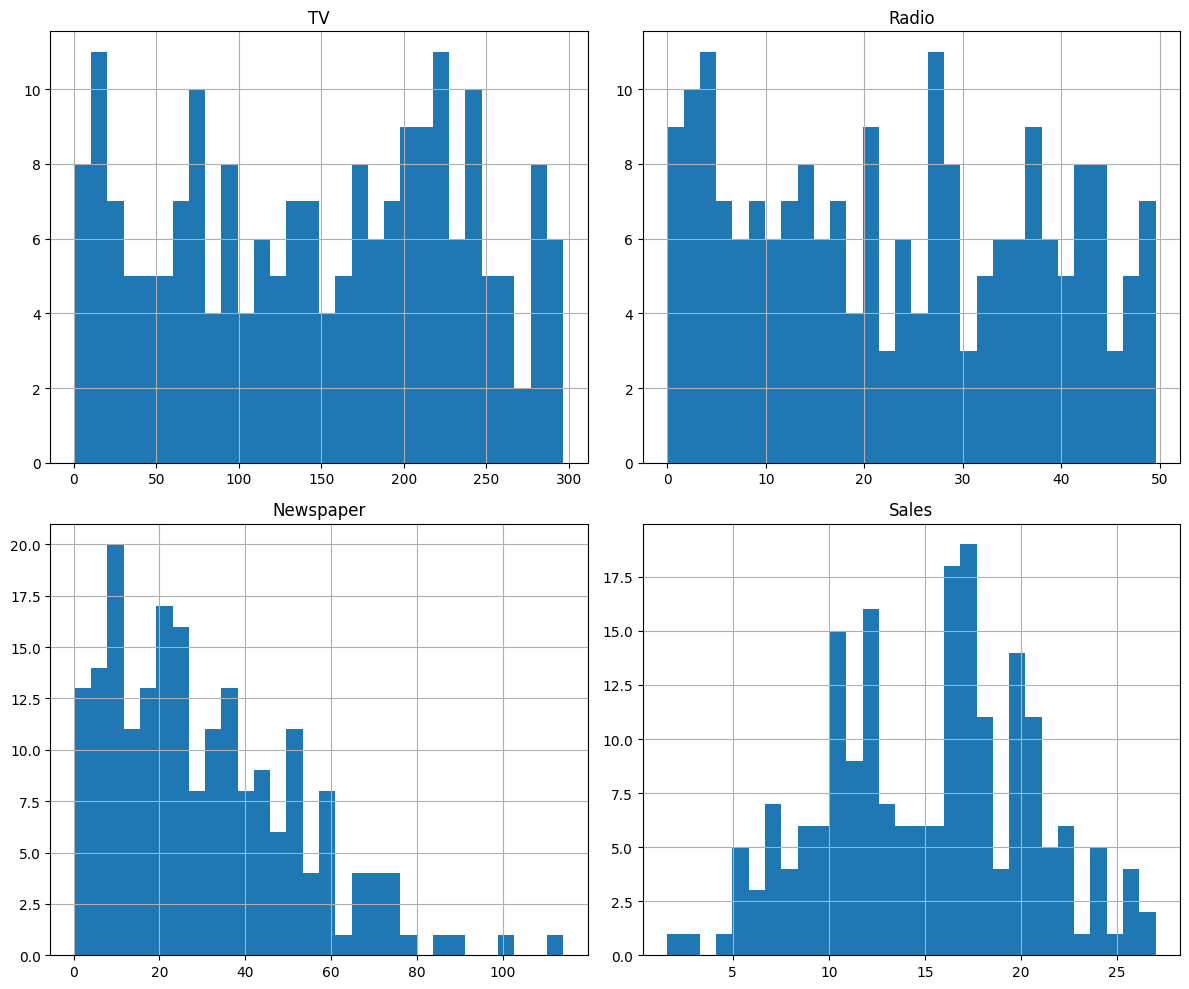

In [7]:
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


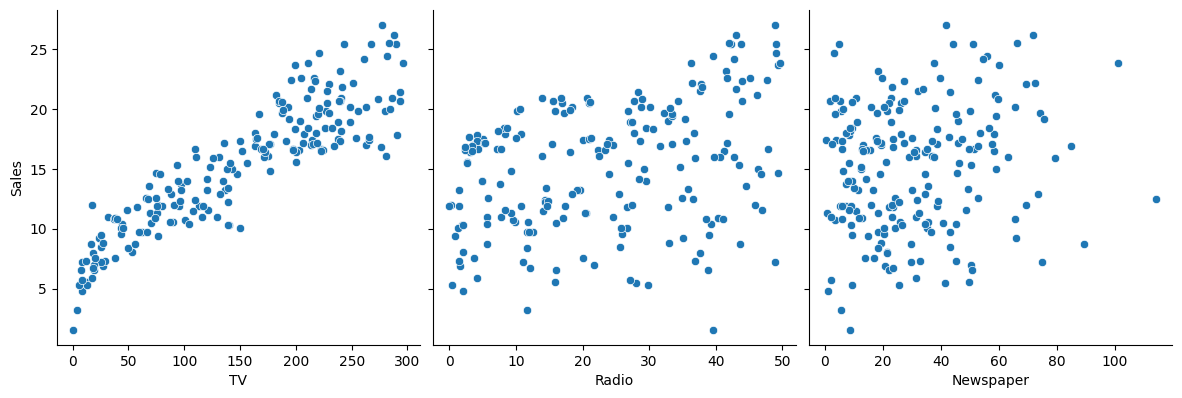

In [8]:
#bivariant factor analysis
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size = 4, aspect = 1)

In [13]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [14]:
###train-test split

y = df['Sales']
X = df[['TV', 'Radio', 'Newspaper']]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [15]:
# MinMax scaler + Decision Tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

Dt=Pipeline(
    [
        ("scl", MinMaxScaler()),
        ("predictor", DecisionTreeRegressor())
    ]
)

Dt.fit(X_train,y_train)
y_pred_train = Dt.predict(X_train)
y_pred_test = Dt.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error

print(f"Train Accuracy: {Dt.score(X_train,y_train):.2f}")
print(f"Test Accuracy: {Dt.score(X_test,y_test):.2f}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.89
Train MSE: 0.00
Test MSE: 3.43


In [17]:
from sklearn.ensemble import RandomForestRegressor

RF=Pipeline(
    [
        ("scl", MinMaxScaler()),
        ("predictor", RandomForestRegressor())
    ]
)

RF.fit(X_train,y_train)
y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)

In [18]:
print(f"Train Accuracy: {RF.score(X_train,y_train):.2f}")
print(f"Test Accuracy: {RF.score(X_test,y_test):.2f}")
print(f"Train MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.2f}")

Train Accuracy: 0.99
Test Accuracy: 0.96
Train MSE: 0.21
Test MSE: 1.32
